## Deeper Dive into Tweet Volume (Y value)
+ Generate pretty charts for and stats for descriptives 
+ test if it's power law dist
+ binarize


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas
%matplotlib inline
import numpy as np
from IPython.display import display, HTML
pandas.set_option('max_colwidth', 1000)

In [3]:
df = pandas.read_csv('DATA/FOR_CORR/all_fields_no_body.csv', index_col=0)

In [4]:
print df.columns
print len(df)

Index([u'url', u'title', u'sentiment_mean', u'num_tweets', u'wc',
       u'negativ_ct', u'positiv_ct', u'negativ_percent', u'positiv_percent',
       u'emotionality', u'positivity'],
      dtype='object')
2651


In [5]:
 df.num_tweets.mean()

46.36589966050547

In [6]:
 df.num_tweets.describe()

count    2651.000000
mean       46.365900
std        60.230918
min        10.000000
25%        15.000000
50%        26.000000
75%        52.000000
max      1261.000000
Name: num_tweets, dtype: float64

(array([ 158.,  128.,    0., ...,    0.,    0.,    1.]),
 array([   10.    ,    10.6255,    11.251 , ...,  1259.749 ,  1260.3745,
         1261.    ]),
 <a list of 2000 Patch objects>)

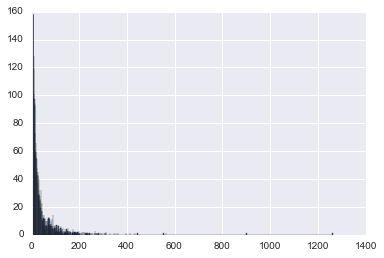

In [7]:
plt.hist(df.num_tweets, bins=2000)

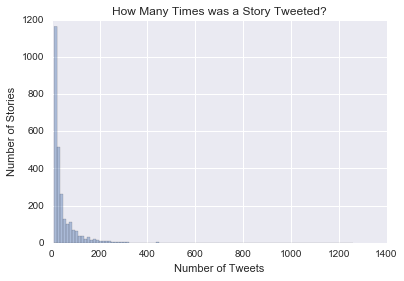

In [8]:
numtweets = list(df.num_tweets)
numtweets.sort(reverse=True)
sns.distplot(numtweets, kde=False, rug=False, bins=100);
plt.title("How Many Times was a Story Tweeted?")
plt.ylabel("Number of Stories")
plt.xlabel("Number of Tweets")
plt.savefig("FIGS/CORR/num_tweets_dist.png")

## is it a power law?
Returns the loglikelihood ratio, and its p-value, between the two distribution fits, assuming the candidate distributions are nested.
### R : float
Loglikelihood ratio of the two distributions’ fit to the data. If greater than 0, the first distribution is preferred. If less than 0, the second distribution is preferred.
### p : float
Significance of R

In [9]:
import powerlaw 
data = numtweets # data can be list or numpy array 
results = powerlaw.Fit(data) 
print results.power_law.alpha 
print results.power_law.xmin 
R, p = results.distribution_compare('power_law', 'lognormal', normalized_ratio=True)
print "R", R
print "p", p
 

Calculating best minimal value for power law fit
'nan' in fit cumulative distribution values.

4.05233465822
170.0
R 0.202683453995
p 0.839382456554



Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


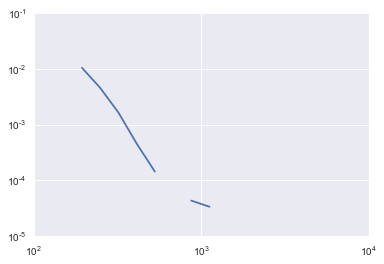

In [10]:
results.plot_pdf()

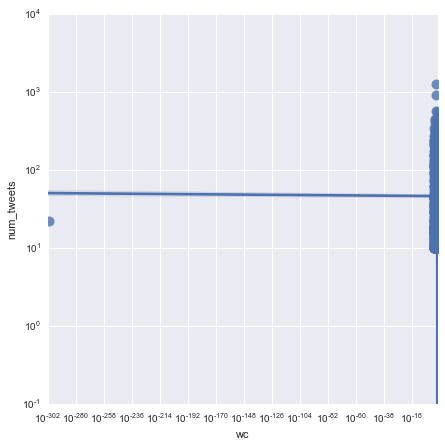

In [13]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot("wc", "num_tweets", data=df, ax=ax, scatter_kws={"s": 100})


### Do them transforms

In [34]:
df = df.dropna()

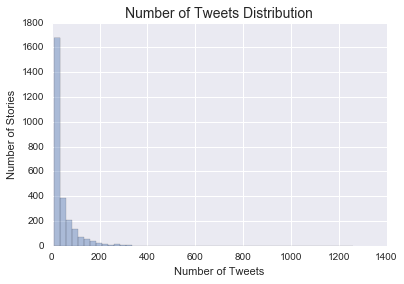

In [72]:
sns.distplot(df.num_tweets, kde=False, rug=False);
plt.title("Number of Tweets Distribution", fontsize=14)
plt.xlabel("Number of Tweets")
plt.ylabel("Number of Stories")
plt.savefig("FIGS/CORR/num_tweets_dist.png")

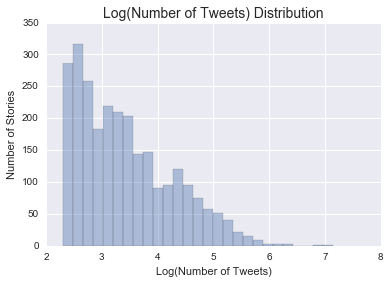

In [74]:
sns.distplot(df.log_num_tweets, kde=False, rug=False);
plt.title("Log(Number of Tweets) Distribution", fontsize=14)
plt.xlabel("Log(Number of Tweets)")
plt.ylabel("Number of Stories")
plt.savefig("FIGS/CORR/log_num_tweets_dist.png")

In [78]:
df['log_log_num_tweets'] = df.log_num_tweets.apply(np.log)
df['log_log_log_num_tweets'] = df.log_log_num_tweets.apply(np.log)

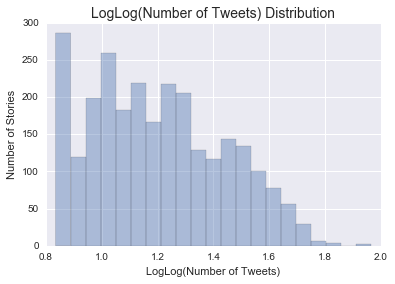

In [85]:
sns.distplot(df.log_log_num_tweets, kde=False, rug=False);
plt.title("LogLog(Number of Tweets) Distribution", fontsize=14)
plt.xlabel("LogLog(Number of Tweets)")
plt.ylabel("Number of Stories")
plt.savefig("FIGS/CORR/log_log_num_tweets_dist.png")

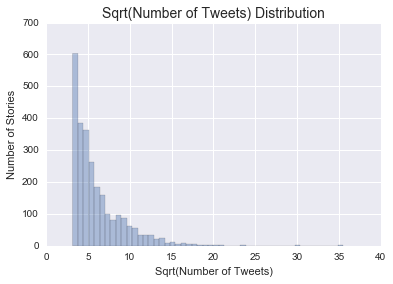

In [73]:
sns.distplot(df.sqrt_num_tweets, kde=False, rug=False);
plt.title("Sqrt(Number of Tweets) Distribution", fontsize=14)
plt.xlabel("Sqrt(Number of Tweets)")
plt.ylabel("Number of Stories")
plt.savefig("FIGS/CORR/sqrt_num_tweets_dist.png")

In [35]:
df['log_num_tweets'] = df.num_tweets.apply(np.log)
df['log_wc'] = df.wc.apply(np.log)
df['log_emot'] = df.emotionality.apply(lambda x: np.log(x + 1))
df['log_pos'] = df.positivity.apply(lambda x: np.log(x + 1))

In [68]:
df['sqrt_num_tweets'] = df.num_tweets.apply(np.sqrt)
df['sqrt_wc'] = df.wc.apply(np.sqrt)
df['sqrt_emot'] = df.emotionality.apply(np.sqrt)
df['sqrt_pos'] = df.positivity.apply(lambda x: np.sqrt(abs(x)))

In [61]:
df['sq_num_tweets'] = df.num_tweets.apply(np.square)
df['sq_wc'] = df.wc.apply(np.square)
df['sq_emot'] = df.emotionality.apply(np.square)
df['sq_pos'] = df.positivity.apply(np.square)

## first plot independent variables

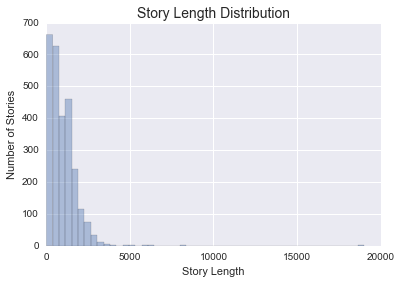

In [57]:
sns.distplot(df.wc, kde=False, rug=False);
plt.title("Story Length Distribution", fontsize=14)
plt.xlabel("Story Length")
plt.ylabel("Number of Stories")
plt.savefig("FIGS/CORR/wc_dist.png")

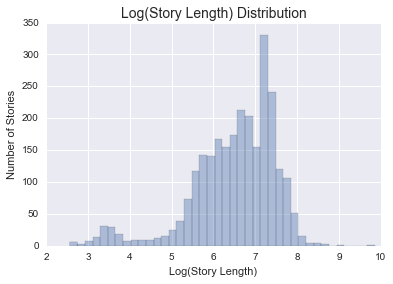

In [58]:
sns.distplot(df.log_wc, kde=False, rug=False);
plt.title("Log(Story Length) Distribution", fontsize=14)
plt.xlabel("Log(Story Length)")
plt.ylabel("Number of Stories")
plt.savefig("FIGS/CORR/log_wc_dist.png")

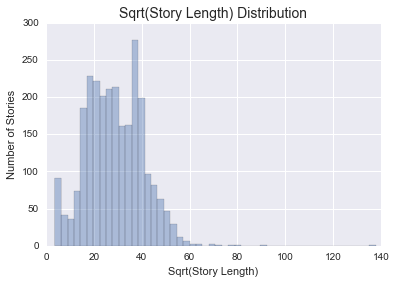

In [62]:
sns.distplot(df.sqrt_wc, kde=False, rug=False);
plt.title("Sqrt(Story Length) Distribution", fontsize=14)
plt.xlabel("Sqrt(Story Length)")
plt.ylabel("Number of Stories")
plt.savefig("FIGS/CORR/sqrt_wc_dist.png")

In [ ]:
sns.distplot(df.log_wc, kde=False, rug=False);
plt.title("Log(Story Length) Distribution", fontsize=14)
plt.xlabel("Log(Story Length)")
plt.ylabel("Number of Stories")
plt.savefig("FIGS/CORR/log_wc_dist.png")

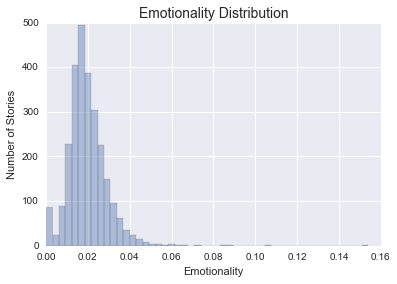

In [56]:
sns.distplot(df.emotionality, kde=False, rug=False);
plt.title("Emotionality Distribution", fontsize=14)
plt.xlabel("Emotionality")
plt.ylabel("Number of Stories")
plt.savefig("FIGS/CORR/emot_dist.png")

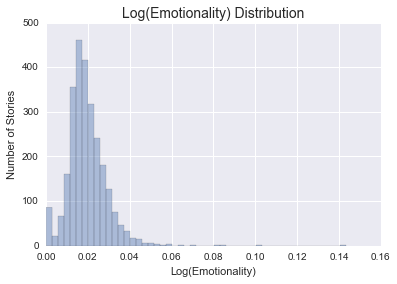

In [64]:
sns.distplot(df.log_emot, kde=False, rug=False);
plt.title("Log(Emotionality) Distribution", fontsize=14)
plt.xlabel("Log(Emotionality)")
plt.ylabel("Number of Stories")
plt.savefig("FIGS/CORR/log_emot_dist.png")

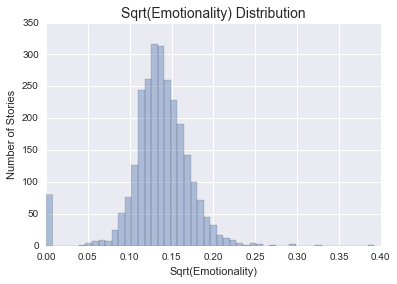

In [65]:
sns.distplot(df.sqrt_emot, kde=False, rug=False);
plt.title("Sqrt(Emotionality) Distribution", fontsize=14)
plt.xlabel("Sqrt(Emotionality)")
plt.ylabel("Number of Stories")
plt.savefig("FIGS/CORR/sqrt_emot_dist.png")

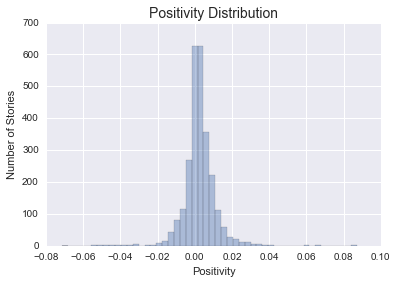

In [55]:
sns.distplot(df.positivity, kde=False, rug=False);
plt.title("Positivity Distribution", fontsize=14)
plt.xlabel("Positivity")
plt.ylabel("Number of Stories")
plt.savefig("FIGS/CORR/pos_dist.png")

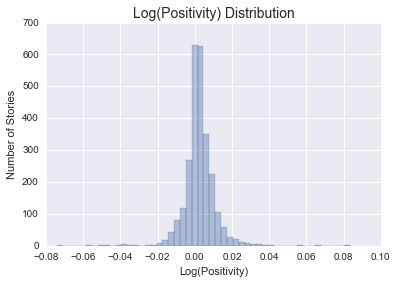

In [66]:
sns.distplot(df.log_pos, kde=False, rug=False);
plt.title("Log(Positivity) Distribution", fontsize=14)
plt.xlabel("Log(Positivity)")
plt.ylabel("Number of Stories")
plt.savefig("FIGS/CORR/log_pos_dist.png")

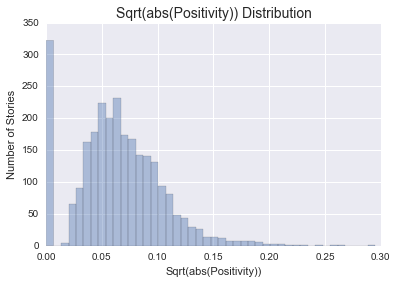

In [70]:
sns.distplot(df.sqrt_pos, kde=False, rug=False);
plt.title("Sqrt(abs(Positivity)) Distribution", fontsize=14)
plt.xlabel("Sqrt(abs(Positivity))")
plt.ylabel("Number of Stories")
plt.savefig("FIGS/CORR/sqrt_pos_dist.png")

## then plot relationships

In [36]:
df.wc.min()

13

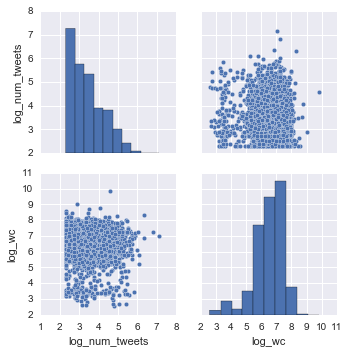

In [38]:
g = sns.pairplot(df[['log_num_tweets', 'log_wc']])

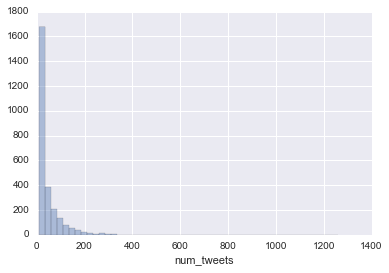

In [42]:
sns.distplot(df.num_tweets, kde=False, rug=False); 